# Zadanie 3 Przetwarzanie i Analiza Dużych zbiorów danych<br/>

**Barbara Morawska &nbsp;&nbsp;&nbsp;234096<br/> 
Andrzej Sasinowski &nbsp;&nbsp; 234118<br/>
Marcin Markiewicz &nbsp;&nbsp;&nbsp;&nbsp; 234090 <br/>**

Napisaliśmy program, który implementuje algorytm k-średnich z uwzględnieniem dwóch miar: euklidesowej oraz Manhattan, oraz dwóch strategii rozmieszczenia centroidów początkowych dla losowego rozmieszczenia 3b.txt oraz dla najdalej oddalonych od siebie punktów 3c.txt<br/>

### Kod programu

In [0]:
import sys
import math
from typing import List, Tuple


# Define constants
DIMENSIONS = 58
MAX_FLOAT_VALUE = sys.float_info.max
DISTANCE_MEASURE_METHODS = ['MANHATTAN','EUCLIDEAN']
INITIAL_ARRANGEMENTS  = ['3b.txt','3c.txt']

def prepare_data(txt: str) -> List[List[float]]:
    return  sc.textFile(txt)  \
           .map(lambda line: line.split(" ")) \
           .map(lambda line: [float(x) for x in line])  
  

In [0]:
def euclidian_distance_sqr(x: List[float], y: List[float]) -> float:
    return sum([(a - b) ** 2 for a, b in zip(x, y)])

def manhattan_distance(x: List[float],y: List[float]) -> float:
    return sum(abs(a-b) for a,b in zip(x,y))
  

In [0]:
def clone_centroids(centroids: List[List[float]]) -> List[List[float]]:
      return [x[:] for x in centroids]


def point_add(point1: List[float], point2: List[float]):
    for i in range(len(point1)):
        point1[i] += point2[i]



In [0]:
def nearest_centroid(point: List[float], method: str) -> Tuple[int, List[float]]:
    closest_centroid = None
    closest_distance = MAX_FLOAT_VALUE
    for i, centroid in enumerate(centroids):
        if method == 'MANHATTAN':
            point_distance = manhattan_distance(centroid, point) 
        else :
            point_distance = euclidian_distance_sqr(centroid, point)
            
        if point_distance < closest_distance:
            closest_distance = point_distance
            closest_centroid = i

    return closest_centroid, point
        
def update_centroid(centroid: Tuple[int, List[List[float]]], method: str) -> Tuple[int, List[float], float]:
    centroid_id, points = centroid
    num_points = len(points)
    cost = 0

    new_centroid = [0] * DIMENSIONS
  
    for point in points:
        if method == 'MANHATTAN':
            cost += manhattan_distance(centroids[centroid_id], point)
        else :
            cost += euclidian_distance_sqr(centroids[centroid_id], point)
        point_add(new_centroid, point)

    return centroid_id, [value / num_points for value in new_centroid], cost

In [0]:
def display_results(centroids, costs,method,arrangement):
  # print centroids
  print('\n\nFOR FILE {} WITH {} DISTANCE \nCOMPLETED IN {} ITERATIONS\n\n '.format(arrangement, method, iterations ))
  print('COSTS\n=========================================')
  print('{:>12}  {:>12} {:>12}'.format('iteration', 'cost', 'percentage cost difference'))
  for i, cost_i in enumerate(costs):
      print('{:>12}  {:>12} {:>12}'.format(i, round(cost_i, 4), str(round((costs[0]-costs[i])/costs[0] * 100,2))+'%'))
  print('\n\n')
  print('PERCENTAGE CHANGE IN COST {}% FOR {} DISTANCE'.format(round((costs[0]-costs[9])/costs[0] * 100,2), method))  



In [0]:
iterations = 20
allcosts = []
costs = []
dataset=prepare_data("dbfs:/FileStore/Zadanie3/3a.txt")
for arrangement in INITIAL_ARRANGEMENTS:
  for method in DISTANCE_MEASURE_METHODS:
    centroids = prepare_data("FileStore/Zadanie3/"+arrangement).collect()
    updated_centroids = clone_centroids(centroids) 
    for i in range(0, iterations):
        centroids = clone_centroids(updated_centroids)
        nearest_centroids = dataset.map(lambda x: nearest_centroid(x,method)) 
        new_centroids = nearest_centroids.groupByKey().map(lambda x: update_centroid(x,method)).collect()

        total_cost = 0
        for index, centroid_i, cost_i in new_centroids:
            total_cost += cost_i
            updated_centroids[index] = centroid_i

        costs.append(total_cost)
    display_results(centroids, costs, method, arrangement)
    allcosts.append(costs.copy())
    costs.clear()


FOR FILE 3b.txt WITH MANHATTAN DISTANCE 
COMPLETED IN 20 ITERATIONS

 
COSTS
=========================================
 iteration cost percentage cost difference
 0 550117.142 0.0%
 1 464869.2759 15.5%
 2 470897.3823 14.4%
 3 483914.4092 12.03%
 4 489216.071 11.07%
 5 487629.6685 11.36%
 6 483711.9232 12.07%
 7 475330.7735 13.59%
 8 474871.2388 13.68%
 9 457232.9201 16.88%
 10 447494.3862 18.65%
 11 450915.0126 18.03%
 12 451250.3671 17.97%
 13 451974.5955 17.84%
 14 451570.3641 17.91%
 15 452739.0114 17.7%
 16 453082.7303 17.64%
 17 450583.6709 18.09%
 18 450368.7493 18.13%
 19 449011.3637 18.38%



PERCENTAGE CHANGE IN COST 16.88% FOR MANHATTAN DISTANCE


FOR FILE 3b.txt WITH EUCLIDEAN DISTANCE 
COMPLETED IN 20 ITERATIONS

 
COSTS
=========================================
 iteration cost percentage cost difference
 0 623660345.3064 0.0%
 1 509862908.2975 18.25%
 2 485480681.872 22.16%
 3 463997011.685 25.6%
 4 460969266.573 26.09%
 5 460537847.9828 26.16%
 6 460313099.6535 26.19%
 7 460003523.8894 26.24%
 8 459570539.3177 26.31%
 9 459021103.3423 26.4%
 10 458490656.192 26.48%
 11 457944232.588 26.57%
 12 457558005.1987 26.63%
 13 457290136.3523 26.68%
 14 457050555.0596 26.71%
 15 456892235.6154 26.74%
 16 456703630.737 26.77%
 17 456404203.019 26.82%
 18 456177800.542 26.85%
 19 455986871.0273 26.89%



PERCENTAGE CHANGE IN COST 26.4% FOR EUCLIDEAN DISTANCE


FOR FILE 3c.txt WITH MANHATTAN DISTANCE 
COMPLETED IN 20 ITERATIONS

 
COSTS
=========================================
 iteration cost percentage cost difference
 0 1433739.31 0.0%
 1 1084488.777 24.36%
 2 973431.7147 32.11%
 3 895934.5926 37.51%
 4 865128.3353 39.66%
 5 845846.647 41.0%
 6 827219.5828 42.3%
 7 803590.3456 43.95%
 8 756039.5173 47.27%
 9 717332.9025 49.97%
 10 694587.9253 51.55%
 11 684444.502 52.26%
 12 674574.7475 52.95%
 13 667409.4699 53.45%
 14 663556.6278 53.72%
 15 660162.7772 53.96%
 16 656041.3223 54.24%
 17 653036.7541 54.45%
 18 651112.4263 54.59%
 19 649689.0132 54.69%



PERCENTAGE CHANGE IN COST 49.97% FOR MANHATTAN DISTANCE


FOR FILE 3c.txt WITH EUCLIDEAN DISTANCE 
COMPLETED IN 20 ITERATIONS

 
COSTS
=========================================
 iteration cost percentage cost difference
 0 438747790.0279 0.0%
 1 249803933.626 43.06%
 2 194494814.4063 55.67%
 3 169804841.4515 61.3%
 4 156295748.8063 64.38%
 5 149094208.109 66.02%
 6 142508531.6196 67.52%
 7 132303869.4065 69.85%
 8 117170969.8372 73.29%
 9 108547377.1786 75.26%
 10 102237203.318 76.7%
 11 98278015.7498 77.6%
 12 95630226.1218 78.2%
 13 93793314.0512 78.62%
 14 92377131.9682 78.95%
 15 91541606.2542 79.14%
 16 91045573.8304 79.25%
 17 90752240.1014 79.32%
 18 90470170.1812 79.38%
 19 90216416.1756 79.44%



PERCENTAGE CHANGE IN COST 75.26% FOR EUCLIDEAN DISTANCE

### Analiza wyników

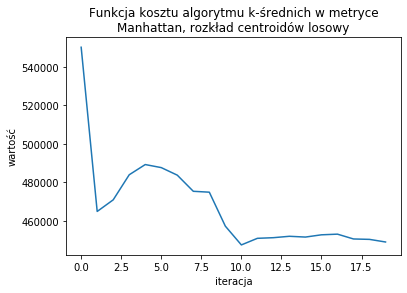

In [0]:
import matplotlib.pyplot as plt
plt.plot(allcosts[0])
plt.xlabel('iteracja')
plt.ylabel('wartość')
plt.title('Funkcja kosztu algorytmu k-średnich w metryce\nManhattan, rozkład centroidów losowy')
plt.show()

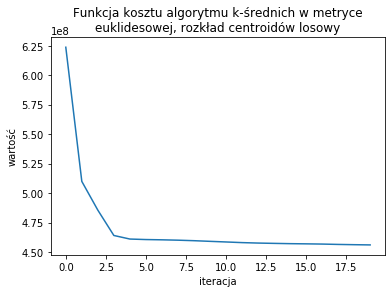

In [0]:
plt.plot(allcosts[1])
plt.xlabel('iteracja')
plt.ylabel('wartość')
plt.title('Funkcja kosztu algorytmu k-średnich w metryce\neuklidesowej, rozkład centroidów losowy')
plt.show()

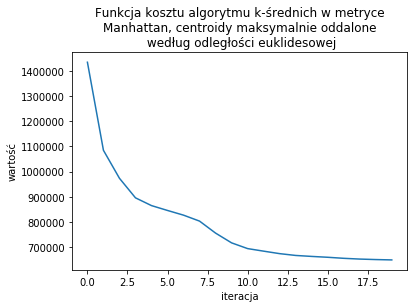

In [0]:
plt.plot(allcosts[2])
plt.xlabel('iteracja')
plt.ylabel('wartość')
plt.title('Funkcja kosztu algorytmu k-średnich w metryce\nManhattan, centroidy maksymalnie oddalone\n według odległości euklidesowej')
plt.show()

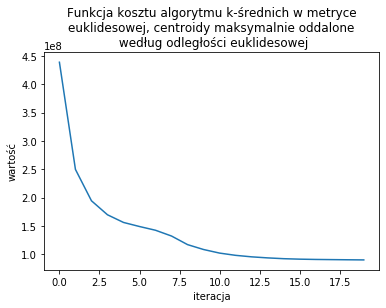

In [0]:
plt.plot(allcosts[3])
plt.xlabel('iteracja')
plt.ylabel('wartość')
plt.title('Funkcja kosztu algorytmu k-średnich w metryce\neuklidesowej, centroidy maksymalnie oddalone\n według odległości euklidesowej')
plt.show()

| Numer iteracji|Miara Manhattan - plik 3b.txt|Miara Manhattan - plik 3c.txt|Miara euklidesowa - plik 3b.txt|Miara euklidesowa - plik 3c.txt|
| ------------- |:---------------------------:|:---------------------------:|:-----------------------------:|------------------------------:|
| 1             |550117                       |1433739                      |623660345                      |438747790                      |
| 2             |464869                       |1084489                      |509862908                      |249803934                      |
| 3             |470897                       |973432                       |485480682                      |194494814                      |
| 4             |483914                       |895935                       |463997012                      |169804841                      |
| 5             |489216                       |865128                       |460969267                      |156295749                      |
| 6             |487630                       |845847                       |460537848                      |149094208                      |
| 7             |483712                       |827220                       |460313100                      |142508532                      |
| 8             |475331                       |803590                       |460003524                      |132303869                      |
| 9             |474871                       |756040                       |459570539                      |117170970                      |
| 10            |457233                       |717333                       |459021103                      |108547377                      |
| 11            |447494                       |694588                       |458490656                      |102237203                      |
| 12            |450915                       |684445                       |457944233                      |98278016                       |
| 13            |451250                       |674575                       |457558005                      |95630226                       |
| 14            |451975                       |667409                       |457290136                      |93793314                       |
| 15            |451570                       |663557                       |457050555                      |92377132                       |
| 16            |452739                       |660163                       |456892236                      |91541606                       |
| 17            |453083                       |656041                       |456703631                      |91045574                       |
| 18            |450584                       |653037                       |456404203                      |90752240                       |
| 19            |450369                       |651112                       |456177801                      |90470170                       |
| 20            |449011                       |649689                       |455986871                      |90216416                       |
| *różnica % między 1 a 10 iteracją*   |**17%**    |**50%**         |**26%**      |**75%**              |

#### Wnioski

- Najlepsze wyniki biorąc pod uwagę najmniejszy koszt operacji po 20 iteracjach został uzyskany przy metryce Manhattan i centroidach losowo wybranych ze zbioru danych.
- Najlepsze wyniki biorąc pod uwagę największą procentową różnicę pomiędzy 1, a 10 iteracją zostały uzyskane przy metryce euklidesowej i centroidach maksymalnie oddalonych według odległości euklidesowej. 
- Mniejsze wartości funkcji kosztu zostały uzyskane w przypadku metryki Manhattan, chociaż zarejestrowana została w nich również mniejsza różnica procentowa między 1, a 10 iteracją w odpowiadających sobie rozkładach początkowych centroidów.
- W metryce euklidesowej początkowe wartości w obu przypadkach początkowego rozkładu centroidów były minimum 2 rzędy wielkości większe niż w metryce Manhattan.
- W przypadku obu metryk większą różnicę procentową między 1 i 10 iteracją dawały centroidy maksymalnie oddalone według odległości euklidesowej
- We wszystkich przypadkach w maksymalnie 10 iteracji rozpoczynało się wypłaszczanie funkcji kosztu. W prawie wszystkich przypadkach funkcja ta była monotoniczna, natomiast w przypadku metryki Manhattan i losowo rozmieszczonych centroidach, w funkcji kosztu można było zaobserwować wzrost między drugą i siódmą iteracją.